In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn.matrix import heatmap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

**Loading the data**

In [ ]:
# importing the feature file to get the features
# using index_col to start the index at this 
data_info = pd.read_csv('/content/lending_club_info.csv',index_col='LoanStatNew')

In [ ]:
# getting the info of a feature just for testing
data_info.loc['revol_util']['Description']

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [ ]:
# making a function to get the information of the features easily
def feat_info(col_name):
  print(data_info.loc[col_name]['Description'])

In [ ]:
# getting the infp of the mortgage account
feat_info('mort_acc')

Number of mortgage accounts.


In [ ]:
# reading the actual dataset
df = pd.read_csv('/content/lending_club_loan_two.csv')

In [ ]:
# printing the head of the dataset
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


Exploratory Data Analysis

In [ ]:
# getting the info of the dataset
# like dtype and total entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
# getting the shape of the dataset
df.shape

(396030, 27)

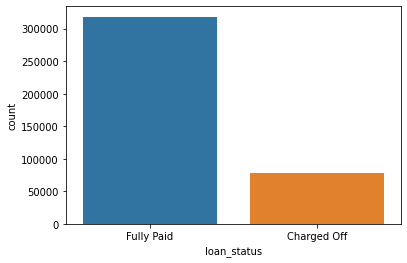

In [ ]:
# since we are attempting to predict loan_status
# we are creating a countplot
sns.countplot(x='loan_status',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


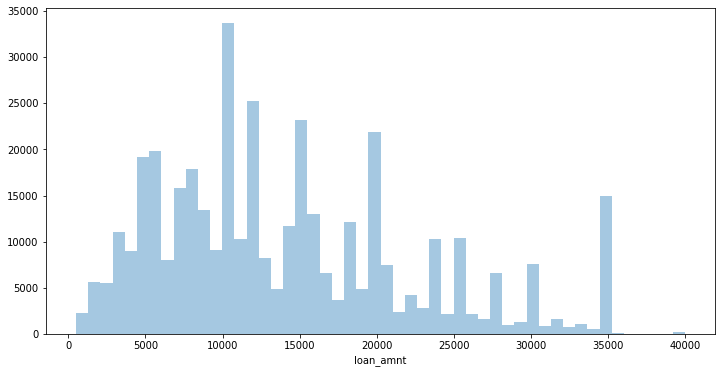

In [ ]:
# now we are creating a distribution plot
# we also removed the line by putting kde = False
plt.figure(figsize=(12,6))
sns.distplot(df['loan_amnt'],kde = False)

In [ ]:
# getting the correlation of each values
# since it is not very clear we are going to build a heat map
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


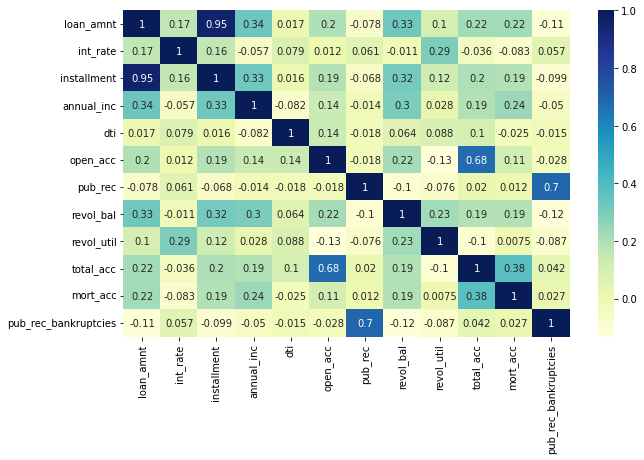

In [ ]:
# creating a heatmap of the correlation
# to write data value in each cell we put annot = True
# fmt = String formatting code to use when adding annotations.
# cmap to select the color of the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

In [ ]:
# we are seeing that tere is a strong correlation of installment and loan_amnt
# so we are going to see if the data is being repeated
# getting the feature info of the intallment coloumn
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [ ]:
# getting the feature info of the loan amount coloumn
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


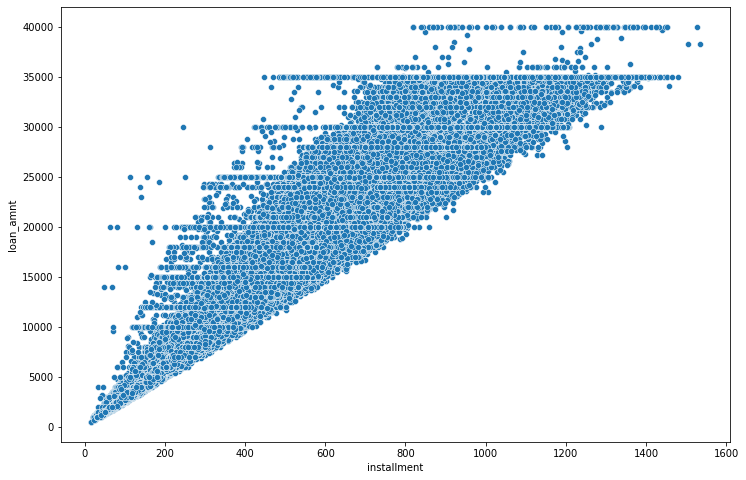

In [ ]:
# so we build a scatter plot and we can see the data is not being repeated
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'installment',y = 'loan_amnt',data=df)

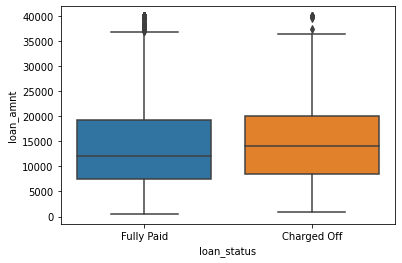

In [ ]:
# we made a boxplot of loan_status and loan_amnt
# we can see that if loan amount is hight it is difficut to return
# hence large amount is being charged of more but by a slight margin
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [ ]:
# as the boxplot was not very clear we called the describe on loan status and loan amount
# to see the mean and as we can see it is slighty high
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
# now we are seeing the grade coloumns
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
# now we see the subgrade coloumns
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

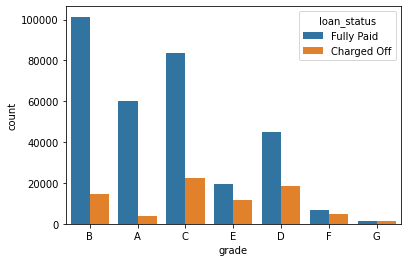

In [ ]:
# plotting a graph for grade with huw loan_status
# we can see that in grade g paid and charge off are of same amount
sns.countplot(x='grade',data=df,hue='loan_status')

In [ ]:
# to get the count plot of the subgrade we have to sort the values
sub_grade_sorted = df.sort_values("sub_grade")["sub_grade"].values

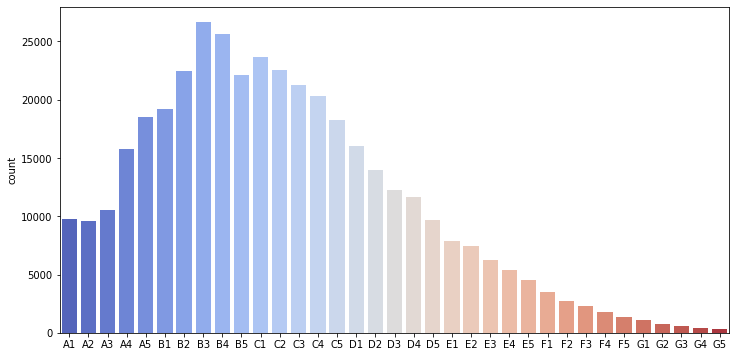

In [ ]:
# now plotting the countplot using the sorted values
# palette to decide the colour
plt.figure(figsize=(12,6))
sns.countplot(x=sub_grade_sorted,data=df,palette='coolwarm')

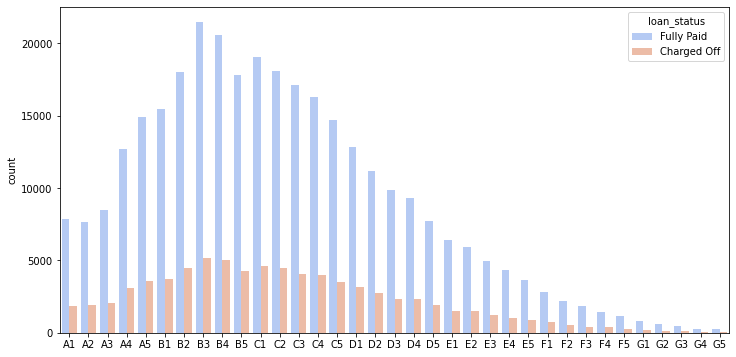

In [ ]:
# now putting hue as loan status to see which subgroup has highest charged off rate
plt.figure(figsize=(12,6))
sns.countplot(x=sub_grade_sorted,data=df,palette='coolwarm',hue = 'loan_status')

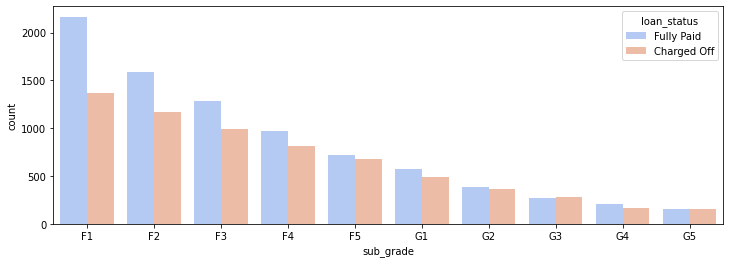

In [ ]:
# as we can see as we go to f and g the ratio gets higher
# so we are going to plot a countplot for only these 2 subgroup
# getting only these 2 subgroup
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
# sorting the f and g values
subgrade_order = sorted(f_and_g['sub_grade'].unique())
# then plotting the same graph
sns.countplot(x='sub_grade', data=f_and_g,order=subgrade_order,palette='coolwarm',hue = 'loan_status')
# as we can see the ratio is almost 1 in g5

In [ ]:
# seeing the loan_status coloumn
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [ ]:
# creating a new coloumn and putting the fully paid = 1 and charged off = 0
# we are using the map function
df['loan_repaid'] = df['loan_status'].map({'Fully Paid' : 1, 'Charged Off' : 0})

In [ ]:
# now checking the loan repaid and loan status coloumns
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


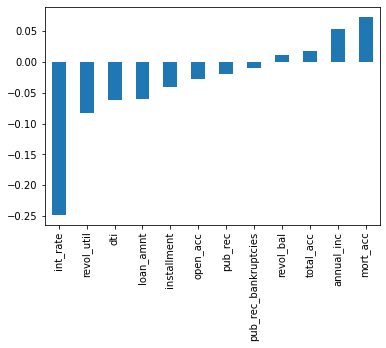

In [ ]:
# now seeing correlation of loan repaid to other coloumns
# then plotting a graph of the correlation
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

Data PreProcessing

In [ ]:
# getting the lenght of the dataset
len(df)

396030

Missing Data

In [ ]:
# knowing number of null values in the dataset
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
# getting the percentage of the dataset
# now we have 3 choices
# first:- we delete the null values
# second:- we delete the coloumns having null values
# third:- we fill the null values
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [ ]:
# feature information of the employment title
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [ ]:
# feature information of the employment lenght
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [ ]:
# getting length of unique values in employment title
len(df['emp_title'].unique())

173106

In [ ]:
# that means there are many different type of employment titles
# so we cannot fill it and the correlation of this to the loan status 
# hence we can drop this coloumn
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
# dropping the coloumn
df = df.drop(columns=['emp_title'],axis=1)

In [ ]:
# sorting the employment lenght unique values to plot a countplot
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
emp_length_sorted = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

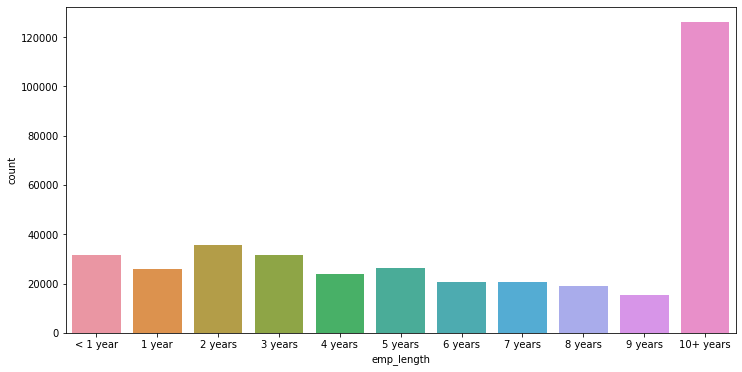

In [ ]:
# plotting the countplot for employment lenght
plt.figure(figsize = (12,6))
sns.countplot(x='emp_length',data=df,order=emp_length_sorted)

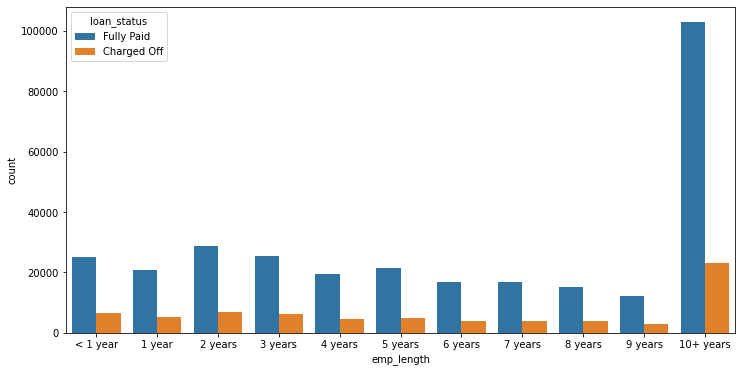

In [ ]:
# now putting hue as loan_status
plt.figure(figsize = (12,6))
sns.countplot(x='emp_length',data=df,order=emp_length_sorted,hue='loan_status')

In [ ]:
# getting the value count for the employment lenght
# we still cant decide if there is any correlation with loan status 
# so we will have to get the graph with the ratio of the paid and charged off
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [ ]:
# getting the fully paid count
fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [ ]:
# getting the charged off count
co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [ ]:
# getting the percentage of chaged off
emp_len = co/(fp+co)*100

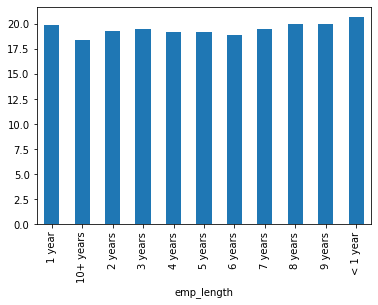

In [ ]:
# as all are almost the same we are going to drop the employment length coloumn
emp_len.plot(kind='bar')

In [ ]:
# dropping the coloumn
df = df.drop('emp_length',axis=1)

In [ ]:
# seeing the left out null values
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
# feature information of pupose
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [ ]:
# feature information of title
feat_info('title')

The loan title provided by the borrower


In [ ]:
# value counts of the title
df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [ ]:
# value counts of the purpose
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [ ]:
# dropping the title coloumns as the data is reoccuring
# and there are null values
df = df.drop('title',axis=1)

In [ ]:
# feature information of the mort_acc
feat_info('mort_acc')

Number of mortgage accounts.


In [ ]:
# value counts of the mort accounts
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
# getting the correlation of mort_acc with the other coloumns
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [ ]:
# we will fill the mort_acc by using the mean of the total account
# getting the average
avg_mort_acc = df.groupby('total_acc').mean()['mort_acc']
print(avg_mort_acc)

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64


In [ ]:
# forming a function that will return mean value if there are are any null value
def fill_mort_acc(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return avg_mort_acc[total_acc]
  else:
    return mort_acc 

In [ ]:
# now applying the function using .apply and lamda function
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [ ]:
# checking to see if there are still any null values
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [ ]:
# as the null values in revol_util and pub_rec_bankrupcies are very low i.e less than 0.5%
# we are dropping all the null values by using dropna
df = df.dropna()

In [ ]:
# checking to see if there are any more null values
# as you can see there are not
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

Categorical Variables and Dummy Variables

In [ ]:
# getting the coloumns with data type as object
# i.e categorical values
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [ ]:
# feature information of term
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [ ]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [ ]:
# getting only the first three digits of the term and converting it to int type
df['term'] = df['term'].apply(lambda term : int(term[:3]))

In [ ]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [ ]:
# dropping the grade coloumn
df = df.drop('grade',axis=1)

In [ ]:
# getting a dummies and dropping the subgrade coloumns 
# this is done by the drop_first = True
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
# then we concatinate them to the dataframe
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [ ]:
# we do this for all the catagorical values of the dataframe
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [ ]:
# seeing the coloumns
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [ ]:
# seeing home_ownership value counts
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
# replacing the none and any to others category
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [ ]:
# now doing it for home_ownership as well
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [ ]:
# getting only the zipcode from the address because only that is relevent
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [ ]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [ ]:
# feature information of the issue date
feat_info('issue_d')

The month which the loan was funded


In [ ]:
# this shows that the loan was funded or not and this is what we are trying to predict
# hence this is a data leakage so we drop this coloumn
df = df.drop('issue_d',axis=1)

In [ ]:
# feature information of earliest_cr_line
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [ ]:
# changing it to only year
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [ ]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [ ]:
# now dropping the loan_status coloumn as we have made loan_repaid coloumn
df = df.drop('loan_status',axis=1)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT',
       'zip_c

In [ ]:
# dropping the address as we have extracted the zipcode coloumn
df = df.drop('address',axis=1)

Grabbing a Sample for Training Time

In [ ]:
# now separating the label and data
X = df.drop('loan_repaid',axis=1).values
Y = df['loan_repaid'].values

In [ ]:
# dividing the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=5)

Normalizing the Data

In [ ]:
# getting the min max scaler
scaler = MinMaxScaler()

In [ ]:
# fitting and transforming the training data
X_train = scaler.fit_transform(X_train)

In [ ]:
# only transforming the testing data
X_test = scaler.transform(X_test)

Creating a Model

In [ ]:
# building the model
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
# getting an early_stop to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)

In [ ]:
# fitting the model
model.fit(x=X_train, y=Y_train, epochs=200,batch_size=256 , validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/200
1081/1081 [==============================] - 5s 4ms/step - loss: 0.4196 - val_loss: 0.3657
Epoch 2/200
1081/1081 [==============================] - 5s 4ms/step - loss: 0.3735 - val_loss: 0.3593
Epoch 3/200
1081/1081 [==============================] - 4s 4ms/step - loss: 0.3665 - val_loss: 0.3532
Epoch 4/200
1081/1081 [==============================] - 4s 4ms/step - loss: 0.3400 - val_loss: 0.3011
Epoch 5/200
1081/1081 [==============================] - 5s 4ms/step - loss: 0.2994 - val_loss: 0.2820
Epoch 6/200
1081/1081 [==============================] - 4s 4ms/step - loss: 0.2893 - val_loss: 0.2794
Epoch 7/200
1081/1081 [==============================] - 4s 4ms/step - loss: 0.2862 - val_loss: 0.2781
Epoch 8/200
1081/1081 [==============================] - 4s 4ms/step - loss: 0.2840 - val_loss: 0.2770
Epoch 9/200
1081/1081 [==============================] - 4s 4ms/step - loss: 0.2829 - val_loss: 0.2770
Epoch 10/200
1081/1081 [==============================] - 4s 4ms/step - l

Evaluating Model Performance

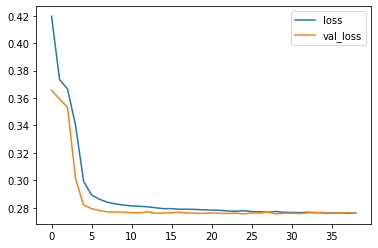

In [ ]:
# getting loss and validation loss and plotting a graph
loss = pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
# getting the predictions
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
# getting the classification report for accuracy which is 89%
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     23150
           1       0.88      1.00      0.94     95416

    accuracy                           0.89    118566
   macro avg       0.94      0.71      0.77    118566
weighted avg       0.90      0.89      0.87    118566

